# Deep Learning



# I. Overview

**Deep Learning** is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks.The objective of this workbook is to develop deep neural network on the classification data. We will explore Deep Neural Networks (DNN) with different combination of hidden layers and hidden units. The basic intuition behind this workbook is that we will learn and explore how the number of factors affect the accuracy of our model in Deep Neural Network. In this workbook we will be using **TensorFlow** library for deep networks and consider the following hyperparameters while implementing deep learning

•	Number of Layers

•	Number of hidden units

•	Find a right balance between bias-variance

•	Preventing the problem of vanishing gradient

•	Activation Functions

•	Optimizer

•	Dropouts

•	Hyperparameters tuning

# II. Data

## Description

Data is the Mushroom Classification Dataset and is taken from Kaggle.This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

Data Source:
G. H. Lincoff (Pres.), Alfred A. Knopf, Jeff Schlimmer (data donor), The Audubon Society Field Guide to North American Mushrooms (1981), https://www.kaggle.com/uciml/mushroom-classification

**Features of the data:**

Data contains the following variables

(classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Reading of the data

In [1]:
# Data read-in

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
# Summary of the data
print(data.shape)

#Structure of the data
data.info()

# Description of the data
data.describe()

#Checking missing values in the data
data.isna().sum()

(8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-a

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [3]:
#Identifying the numerical variables.

data.select_dtypes(include=[np.number]).columns


Index([], dtype='object')

In [4]:
#Identifying categorical values 

data.select_dtypes(exclude=np.number).columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## 	Plots for understanding or analysis

[Text(0, 0, 'Poisonous'), Text(0, 0, 'Edible')]

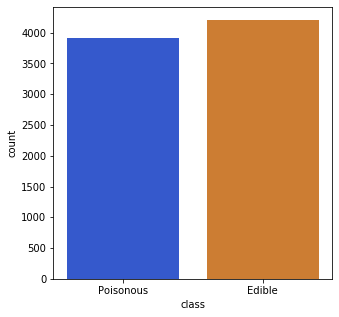

In [5]:
# Checking if the data is balanced on class

class_dict = ('Poisonous', 'Edible')
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot('class', hue=None, palette='bright', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(class_dict)


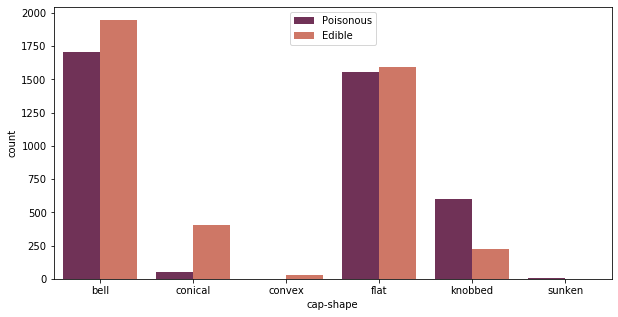

In [6]:
# Count plot on cap shape of the mushroom 

shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('cap-shape', hue='class', palette='rocket', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(shape_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


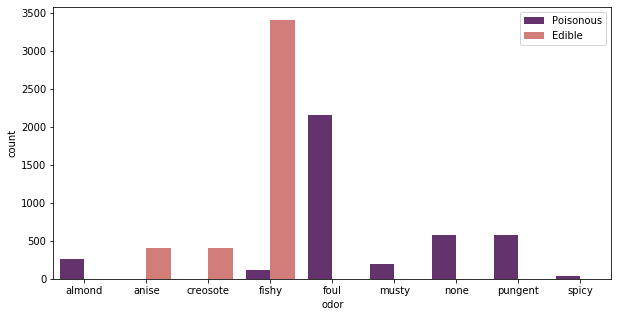

In [7]:
 # Count plot on odor of the mushroom 
    
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y","foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('odor', hue='class', palette='magma', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(odor_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


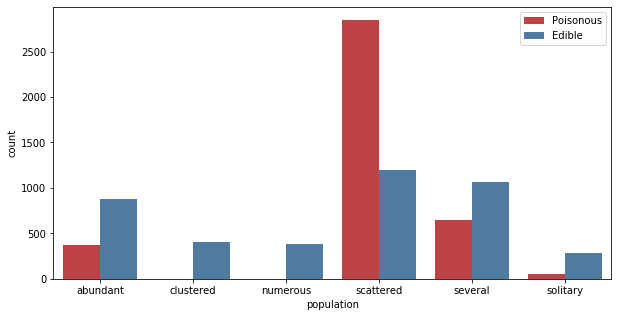

In [8]:
# Count plot on population 

population_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot('population', hue='class', palette='Set1', saturation=0.6, data=data, dodge=True, ax=ax)
ax.set_xticklabels(population_dict)
ax.legend(('Poisonous', 'Edible'), loc=0)


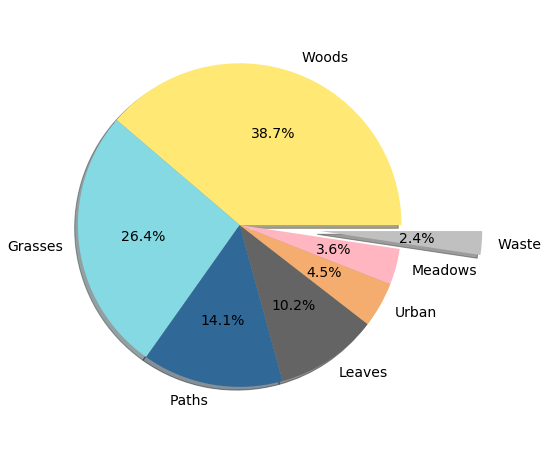

In [9]:
#To display habitat types and its values for a Single Pie chart

habitats = data['habitat'].value_counts()
habitat_size = habitats.values.tolist() #to provide numerical values
habitat_types = habitats.axes[0].tolist() #To convert index labels object to list

# Preparing data

habitat_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#FFE873','#84D9E2','#306998','#646464','#F5AD6F','#FFB6C1','#C0C0C0']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(8,8))

# Pie chart

size, texts, autotexts = plt.pie(habitat_size, explode=explode, labels=habitat_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

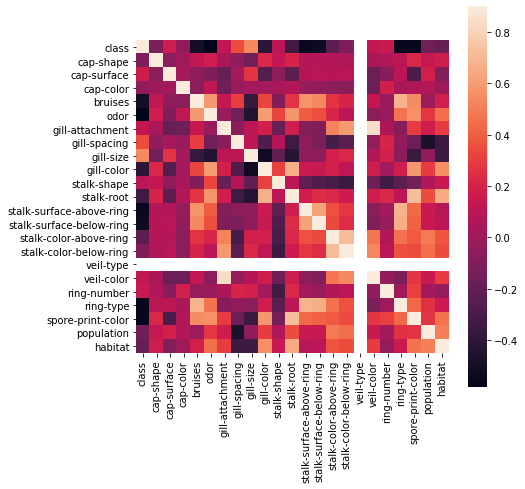

In [10]:
# Finding the correlation of the data using heat map
corr = data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap = "rocket", vmax=0.9, square=True)

In [11]:
# Changing categorical variables into ordinal

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder=LabelEncoder()
data_encoded=data.copy()
for column in data.columns:
    data_encoded[column] = labelencoder.fit_transform(data_encoded[column])
    

In [12]:
correlation = data_encoded.corr()

In [13]:
correlation['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

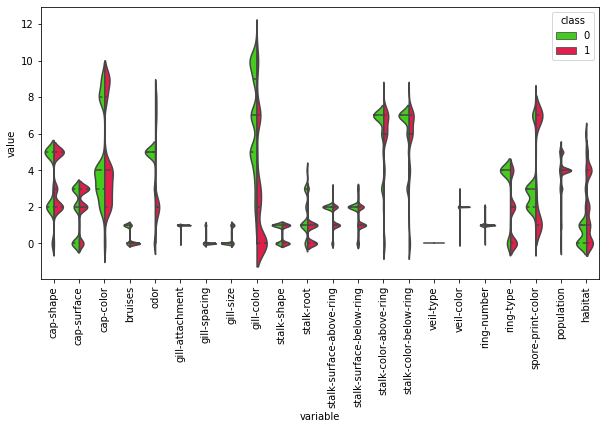

In [14]:
# To find the distribution of the data using violin plot

data_transpose = pd.melt(data_encoded, "class",var_name="variable")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="variable", y="value", hue="class", split = True, data=data_transpose, inner = 'quartile', palette = 'prism')
data_no_class = data.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));


## Preliminary Observations

There are 8124 instances and 23 features. There is not much preprocessing done as there are no missing values in the data. Plotted count plot for class variable and found that the data is balanced. Most of the mushrooms have a cap shape of bell shaped and flat. Mushrooms of fishy order are mostly edible. Most of the mushrooms with foul order are poisonous. Population of scattered mushrooms are poisonous. Most of the mushrooms are present in woods habitat. Correlation is found using heatmap and found many features which are highly correlated.Violin plot shows the distribution and probability distribution of the class over the other features of the dataset, cap-color seems to be balanced on the class.

There are no null values in our dataset. And no issues from the part of categorical attributes because the dataset is encoded and available in data_encoder. Normalization of the data will be handled during the implementation of each algorithm. So, there is no preprocessing done before the application of the algorithms.

# III. Methods

Before implementing Deep learning, we normalize the data and split the data into train and test datasets.

In [15]:
from sklearn.model_selection import train_test_split
def split(X, T):
    return train_test_split(X, T, test_size = .2)

Considering highly correlated features for analysis

In [16]:
data_binary = data_encoded.copy()

X = data_binary.drop(['class','veil-type','stalk-color-below-ring','stalk-shape','odor','cap-color','cap-shape','gill-attachment','veil-color','spore-print-color','cap-surface','ring-number','gill-spacing','stalk-color-above-ring','population','habitat','ring-type'], axis=1)
T = pd.DataFrame(data_binary['class'])
data_new = pd.concat([X, T], axis= 1)
X_train, X_test, T_train, T_test = split(X, T)

print("Shape of X_train{}, X_test{}, T_train{}, T_test{}"
      .format(X_train.shape, X_test.shape, T_train.shape, T_test.shape))

Shape of X_train(6499, 6), X_test(1625, 6), T_train(6499, 1), T_test(1625, 1)


In [17]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
T_train = T_train.reset_index(drop=True)
T_test = T_test.reset_index(drop=True)

In [18]:
onehot_encoder = OneHotEncoder(categories='auto',sparse=False)
training_labels = onehot_encoder.fit_transform(T_train)
test_labels = onehot_encoder.fit_transform(T_test)
print("Shape of T_train{}, T_test{}".format(training_labels.shape, test_labels.shape))

Shape of T_train(6499, 2), T_test(1625, 2)


In [19]:
X_train_np = X_train.values
X_test_np = X_test.values
T_train_np = T_train.values
T_test_np = T_test.values

X_train.shape, X_test.shape, T_train.shape, T_test.shape

((6499, 6), (1625, 6), (6499, 1), (1625, 1))

In [20]:
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
T_train.to_csv('T_train.csv', index = False)
T_test.to_csv('T_test.csv', index = False)

In [21]:
# Normalization:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [22]:
X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

In [23]:
#Necessary Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam, SGD, Adadelta
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

## Explanation of the three different Neural Networks and the reasoning

In this section, we discussed about three different choices of Neural Networks based on number of hidden units, hidden layers, optimizers and other hyperparameter tunings.

### Method 1:

In this method, we are considering and testing the Neural Network with no specific type but randomly without any specific number of hidden units or any other parameters. In this method, we will explore different activation functions such as 'relu', 'sigmoid', 'selu', 'tanh' with different number of hidden units and some optimizers like RMSProp, Adam, SGD, Adadelta. For this method, considered the number of hidden of layers as a constant 5 and will not play around it. The purpose for this method is just to explore the network with different combination of parameters. As we are working on classification data, for the output layer we are using softmax function as a activation function for class prediction.

### Method 2:

After getting a basic intuition behind the functioning of Neural Networks and exploring different combinations on hidden units, activation functions, optimizers. We developed a network based on "Deep Feed Forward" by increasing the number of hidden units and number of hidden layers in a fully connected neural networks. From the previous method, we can observe that the increasing the number of epoch does not affect our model accuracy. And maintaining the same number of hidden units in each layer. We will keep that low and all the activation functions have almost same effect in our previous method, so considering 'ReLu' as our activation function and RMSProp as our optimizer.

### Method 3:

After trying our model on higher number of hidden units and hidden layers in our previous method, we found that even very large number of layers affect our model badly. For this model, we tried to replicate the structure of Extreme Learning Machine (ELM) network. By increasing the number of hidden layers upto certain limit for our network and keeping the number of units for the input layer less and more number of hidden units for each of our hidden layers. Similarly, keeping the epochs less and RMSProp which performed equivalent to other. Additionally, in this method we will add dropouts in some layer and keeping activation function relu.

### Related to the choice of dataset and the method:

Dataset chosen is "Mushroom Classification", which has already been been preprocessed with respect categorical data and binary labels. We have converted the target variable to an indicator matrix. We are implementing the Deep Neural Network (DNN) structures using Keras. We have designed three different structures with various alterations in hidden layers and number of neurons in each layer. The idea is to try out these networks with various combinations of hidden layers, hidden units in each layer and tuning with different hyperparametrs and come up with best structure for our neural network. For the first method, considered hyperparameters on random basis by trying out number of experiments. But for another two methods, we have selected the networks based on the experiments that are performed in the Method 1 with more number of hidden layers and hidden units in each of them.

## Explanation of codes

Here are the key considerations wrt implemenatation of Deep Learning Neural Networks:

• Importing Keras to implement all the three models.

• Used Keras Sequential model to linearly stack the layers for all the three models.

• Used keras.layers.Dense to densely connect the Layers.

• Used keras.layers.Dropout to randomly drop the hidden units in that particular layer.

• Used keras.layers.Activation for Activation Functions like 'relu', 'selu', 'tanh', 'sigmoid'

• Used categorical_crossentropy to determine losses beacuse my data is multi class classification problem.

• Used keras.optimizers.RMSprop and keras.optimizers.Adam.

• Used various evaluation metrics to evaluate my model.

• For all the models, considered softmax as the activation function for the output layer to predict our classes.



## Method/ Model 1

Epoch 1/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6282 - accuracy: 0.7346
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.8327
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8744
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.2105 - accuracy: 0.9465
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.1367 - accuracy: 0.9632
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9768
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0833 - accuracy: 0.9768
Epoch 8/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0737 - accuracy: 0.9785
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0677 - accuracy: 0.9805
Epoch 10/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0630 - accuracy: 0.9809
Epoch 11/20
13/13 [

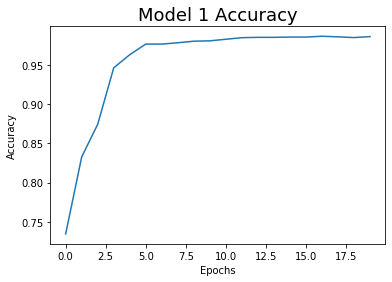

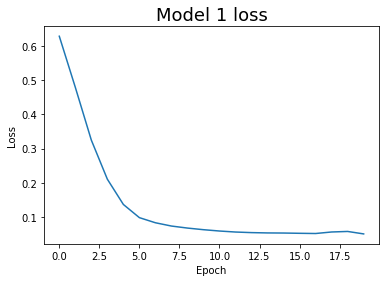

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

 Classification Report 
 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       819
           1       1.00      0.98      0.99       806

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


 Confusion Matrix 
 [[819   0]
 [ 18 788]]

 Accuracy: 98.89 %

 F1 Score:  0.989

 Precision:  0.989

 Recall:  0.989


In [24]:
def model1():
    model1 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function
    model1.add(Dense(12, activation='relu', input_dim= X_train_normalized.shape[1]))

    #adding 5 hidden layers with different number of neurons
    model1.add(Dense(32, activation='relu'))

    model1.add(Dense(64,activation='relu'))

    model1.add(Dense(64,activation='relu'))

    model1.add(Dense(32,activation='relu'))

    model1.add(Dense(32,activation='relu'))

    #Output layer with softmax activation 
    model1.add(Dense(2, activation='softmax'))

    #Choice of optimizer : Adam
    adam = Adam(lr=0.001, epsilon=None, decay=0.0)
    model1.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

    #fitting the model
    history = model1.fit(X_train_normalized, training_labels, epochs=20, batch_size=512, verbose=1)
    #Model Evaluation
    score = model1.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['accuracy'])
    plt.title("Model 1 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 1 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()


    #Predict the values for test set
    y_pred = model1.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np, y_pred))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred, average="macro"),3))
    
    return y_pred

y_pred = model1()

## Method/ Model 2

Epoch 1/7
13/13 [==============================] - 0s 21ms/step - loss: 1.8584 - accuracy: 0.5150
Epoch 2/7
13/13 [==============================] - 0s 21ms/step - loss: 0.5187 - accuracy: 0.7527
Epoch 3/7
13/13 [==============================] - 0s 23ms/step - loss: 0.1924 - accuracy: 0.9565
Epoch 4/7
13/13 [==============================] - 0s 26ms/step - loss: 0.2305 - accuracy: 0.9501
Epoch 5/7
13/13 [==============================] - 0s 26ms/step - loss: 0.1493 - accuracy: 0.9560
Epoch 6/7
13/13 [==============================] - 0s 27ms/step - loss: 0.0781 - accuracy: 0.9786
Epoch 7/7
4/4 [==============================] - 0s 8ms/step - loss: 0.2928 - accuracy: 0.9458


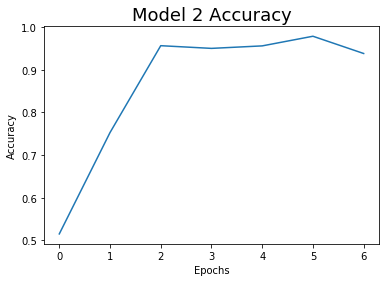

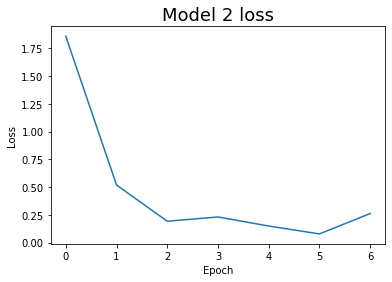


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       819
           1       0.98      0.91      0.94       806

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


 Confusion Matrix 
 [[805  14]
 [ 74 732]]

 Accuracy: 94.58 %

 F1 Score:  0.946

 Precision:  0.949

 Recall:  0.946


In [25]:
def model2():
    model2 = Sequential()


    #input layer with no. of features as input_dim and 'relu' as activation function 
    model2.add(Dense(128, activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 10 hidden layers with 128 neurons 
    model2.add(Dense(128, activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))


    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))

    model2.add(Dense(128,activation='relu'))


    #Output layer with softmax activation 
    model2.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    rmsprop = RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)
    model2.compile(loss='categorical_crossentropy', optimizer= rmsprop, metrics=['accuracy'])

    #fitting the model
    history = model2.fit(X_train_normalized, training_labels, epochs=7, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model2.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['accuracy'])
    plt.title("Model 2 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 2 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_2 = model2.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np,y_pred_2))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_2))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_2)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_2, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_2, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_2, average="macro"),3))

    return y_pred_2

y_pred_2 = model2()


## Method/ Model 3

Epoch 1/10
13/13 [==============================] - 0s 12ms/step - loss: 0.5193 - accuracy: 0.7446
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1623 - accuracy: 0.9548
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0909 - accuracy: 0.9769
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0839 - accuracy: 0.9780
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0826 - accuracy: 0.9782
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9786
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0754 - accuracy: 0.9798
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0746 - accuracy: 0.9798
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0719 - accuracy: 0.9809
Epoch 10/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0701 - accuracy: 0.9803


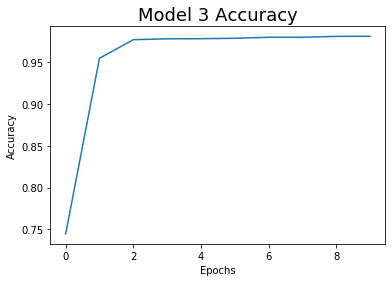

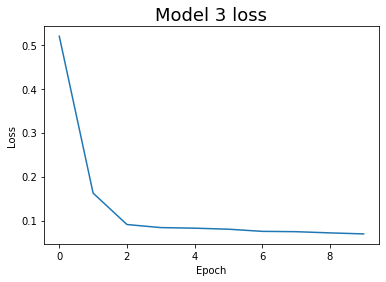


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       819
           1       1.00      0.96      0.98       806

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625


 Confusion Matrix 
 [[819   0]
 [ 32 774]]

 Accuracy: 98.03 %

 F1 Score:  0.98

 Precision:  0.981

 Recall:  0.98


In [26]:
def model3():
    model3 = Sequential()

    #input layer with no. of features as input_dim and 'relu' as activation function 
    model3.add(Dense(30, activation='relu', input_dim=X_train_normalized.shape[1]))

    #adding 7 hidden layers
    model3.add(Dense(30, activation='relu'))
    model3.add(Dropout(0.1))


    model3.add(Dense(30,activation='relu'))

    model3.add(Dense(30,activation='relu'))
    model3.add(Dropout(0.5))

    model3.add(Dense(30,activation='relu'))


    model3.add(Dense(30,activation='relu'))
    model3.add(Dropout(0.3))


    model3.add(Dense(30,activation='relu'))

    model3.add(Dense(30,activation='relu'))



    #Output layer with softmax activation 
    model3.add(Dense(2, activation='softmax'))

    #Choice of optimizer : rmsprop
    adam = Adam(lr=0.01,epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

    #fitting the model
    history = model3.fit(X_train_normalized, training_labels, epochs=10, batch_size=512, verbose=1)

    #Model Evaluation
    score_2 = model3.evaluate(X_test_normalized, test_labels, batch_size=512)

    #Plotting epoch Vs Accuracy
    plt.plot(history.history['accuracy'])
    plt.title("Model 3 Accuracy", fontsize = 18)
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.show()

    #Plotting epoch Vs Loss
    plt.plot(history.history['loss'])
    plt.title('Model 3 loss', fontsize = 18)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    #Predict the values for test set
    y_pred_3 = model3.predict_classes(X_test_normalized)

    #print the classification report
    print("\n Classification Report \n \n",classification_report(T_test_np,y_pred_3))

    #print confusion matrix
    print("\n Confusion Matrix \n",confusion_matrix(T_test,y_pred_3))
    print("\n Accuracy:", round((accuracy_score(T_test,y_pred_3)*100),2), "%")
    print("\n F1 Score: ",round(f1_score(T_test,y_pred_3, average="macro"),3))
    print("\n Precision: ",round(precision_score(T_test,y_pred_3, average="macro"),3))
    print("\n Recall: ",round(recall_score(T_test,y_pred_3, average="macro"),3))

    return y_pred_3

y_pred_3 = model3()


## Explanation of experimental code

So far we have designed and implemented three different structures of Neural Networks (NN) based on certain observations:

1. The first method (Model 1) is based on our random choice of number of hidden units and other parameters . We tried out different possible combination of parameters by keeping number of hidden layers constant. So I tried out different activation functions with different optimizers and find out the best combination.

2. In the second method (Model 2), we tried different structure of Neural Networks having more number of neurons with more hidden layers deeply connected with each other. But keeping all the parameters same as of our previous method results.

3. In the third method (Model 3), we explored another method which is less number of neurons in input layer as compared to the hidden layers.

# Results

## Plots showing the results

### Evaluation metrics

After all the preprocessing and applying various algorithms on our dataset, ultimately we need to check or visualize its performance. And there different means for performance evaluation in each category of Machine Learrning models. For Classification models are to check for Precision, Recall, Area Under the Curve, Accuracy are various performace metrics.

**Confusion Matrix:** This metric is used for both binary as well as Multiple classification problems. The four terms are related to this metric:

i) True Positives(TP): Case where actual class of data are True and predicted class is also True.

ii) True Negatives(TN): Case where actual class of data are False, the predicted class is also False.

iii) False Positives(FP): Case where the actual class of data are False and the predicted class is True.

iv) False Negatives(FN): Case where the actual class of data are True and the predicted class is False.


**Accuracy:** It is the number of correct predictions out of all the predictions made by a model.

$$
Accuracy = \frac {TP + TN} {TP + FP + FN + TN} 
$$
It should not be used when majority of target variable in our dataset are of single class.


**Precision:** It just tells us that how accurate our predictions are.$$
Precision = \frac {TP} {TP + FP} 
$$


**Recall:** Recall tells us about the actual positives.$$
Recall = \frac {TP} {TP + FN} 
$$


**F1 Score:** While calculating performance metrics, we do not need to take care of both Precision and Recall, as both show opposite behaviour to each other. If Recall increase, then precision decreases and vice-versa. So F1 is the single score that represents both Precision and Recall. We calculate by taking Harmonic Mean of both.

$$
F1  Score: \frac {TP}{TP + \frac {FN + FP}{2}}
$$


### ROC Curve

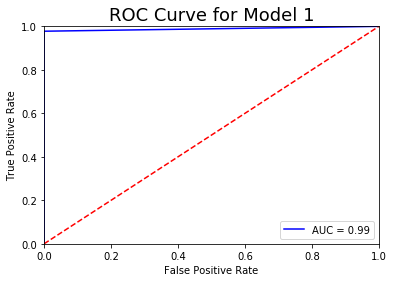

In [27]:
fpr, tpr, threshold = roc_curve(T_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 1', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

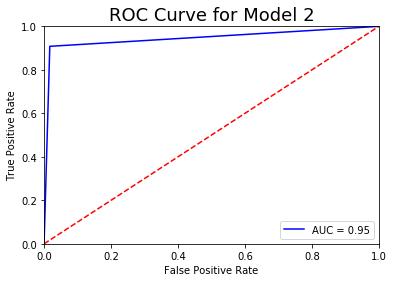

In [28]:
fpr, tpr, threshold = roc_curve(T_test_np, y_pred_2)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 2', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

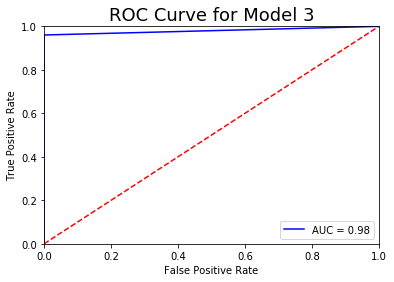

In [29]:
fpr, tpr, threshold = roc_curve(T_test_np, y_pred_3)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Model 3', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Plotting the curve to compare Actual and Predicted values 

Plotting the curves for first 200 values to reduce the visualization clutter

Text(0.5, 1.0, 'Model 1 : Predicted Vs Output')

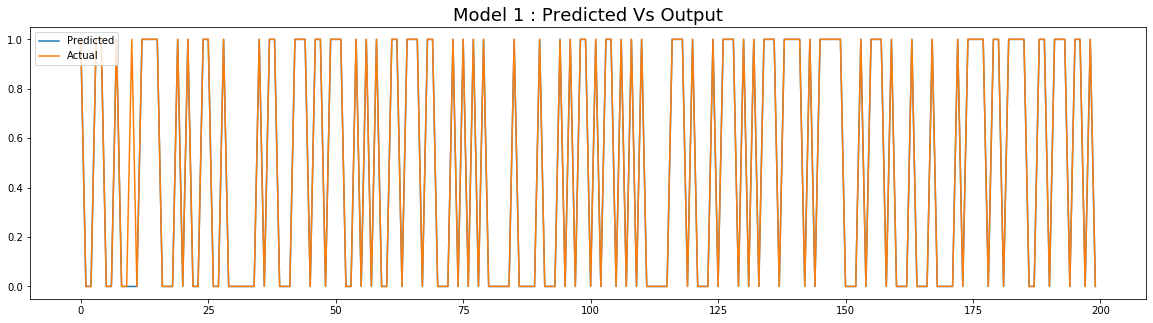

In [30]:
plt.figure(figsize=(20,5))
plt.plot(y_pred[0:200], label = 'Predicted')
plt.plot(T_test_np[0:200], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 1 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 2 : Predicted Vs Output')

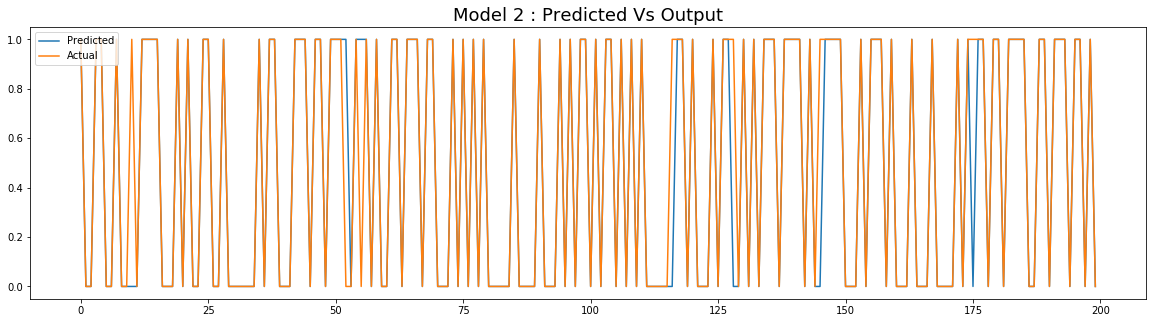

In [31]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_2[0:200], label = 'Predicted')
plt.plot(T_test_np[0:200], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 2 : Predicted Vs Output", fontsize = 18)

Text(0.5, 1.0, 'Model 3 : Predicted Vs Output')

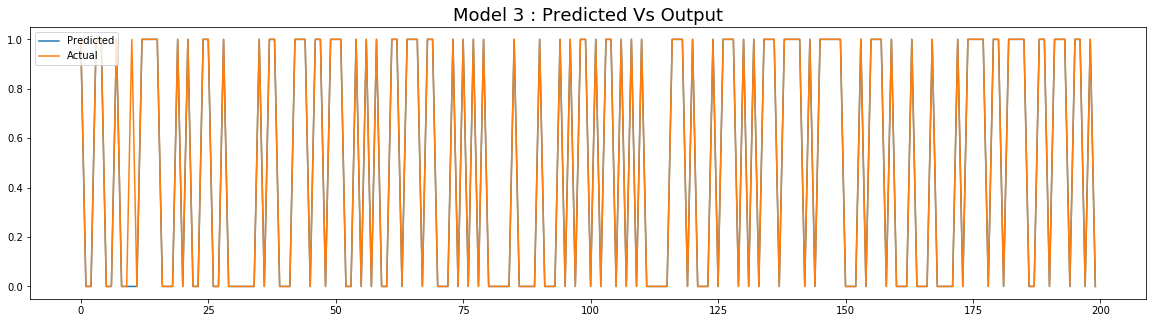

In [32]:
plt.figure(figsize=(20,5))
plt.plot(y_pred_3[0:200], label = 'Predicted')
plt.plot(T_test_np[0:200], label = 'Actual')
plt.legend(loc='upper left')
plt.title("Model 3 : Predicted Vs Output", fontsize = 18)

## Discussion about choice of network

Above we have implemented three different structures of Neural Network with various combination of hidden units and hidden layers. Each of them showing almost same results. For the classification data accuracy is not only the measure but there are other evaluation metrics also like Precision, Recall, F1 score etc. It depends on our requirement on our need, so we design our structure accordingly.

So in our case the first method we selected, which is purely random having no particular structure performs better from all other in all terms of evaluation. It has highest accuracy of about 98.9% and more than other two structures. Another important evaluation parameter that is F1 score which is almost same for Method 1 and 3 and less for method 2. This may be due to the consideration of highly correlated features for analysis

Below is the table for comparison for evaluation metrics for all models:

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th></th>
    <th>Accuracy</th>
    <th>F1 score</th> 
    <th>Precision</th>
    <th>Recall</th>
  </tr>
  <tr>
    <th>Method/ Model 1</th>
    <td>98.9%</td> 
    <td>0.989</td>
    <td>0.989</td>
    <td>0.989</td>
  </tr>
    <tr>
    <th>Method/ Model 2</th>
    <td>94.58%</td> 
    <td>0.946</td>
    <td>0.949</td>
    <td>0.946</td>
  </tr>
      <tr>
    <th>Method/ Model 3</th>
    <td>98.03%</td> 
    <td>0.98</td>
    <td>0.981</td>
    <td>0.98</td>
  </tr>
 
</table>

# Conclusions

This work is interesting and challenging as we are exposed to the Deep Learning concepts and libraries for the very first time. We have learnt two different libraries for deep learning that is TensorFlow and Keras. They are actually different in terms of abstraction. Keras is built on tensorflow and is much more abstract then tensorflow. Hence it is quite easy to work on keras especially when we need to get started on some of these libraries.

We explored both of these libraries, implemented Neural Networks on classification dataset, faced a lot of new challenges and problem but most importantly learned a lot of new thingst about how Deep Neural Network works and implemented the same for three different structure.

So the first structure was totally on the random basis for 5 layers and tried different parameters. But for the second, changed few factors which reduces or affects accuracy of model slightly, hence tried different network with more hidden layers and hidden units. For the third model, we have learnt that the large number of layers can slightly degrade our model.

## Extra Optional Analysis

### Calculating the training speed with CPU


Epoch 1/20
13/13 [==============================] - 0s 17ms/step - loss: 0.6136 - accuracy: 0.8152
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.3921 - accuracy: 0.9251
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 0.9260
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.1912 - accuracy: 0.9412
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.1561 - accuracy: 0.9545
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1258 - accuracy: 0.9591
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.1001 - accuracy: 0.9640
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0809 - accuracy: 0.9766
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0679 - accuracy: 0.9815
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0625 - accuracy: 0.9826
Epoch 11/20
13/13 

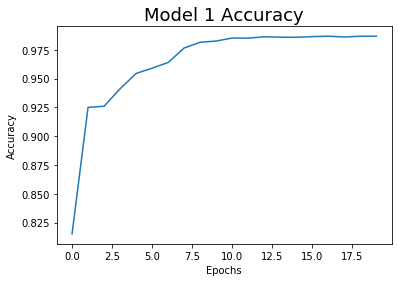

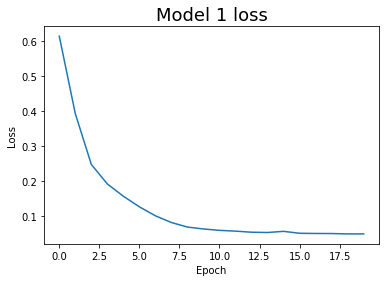


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       819
           1       1.00      0.98      0.99       806

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


 Confusion Matrix 
 [[819   0]
 [ 18 788]]

 Accuracy: 98.89 %

 F1 Score:  0.989

 Precision:  0.989

 Recall:  0.989
Time taken by Model 1 :  5.084234952926636 seconds


In [33]:
#Record Training times
training_time = []

import time
start1 = time.time()
model1()
end1 = time.time()
print("Time taken by Model 1 : ",(end1 - start1),"seconds")
training_time.append((end1 - start1))

Epoch 1/7
13/13 [==============================] - 0s 21ms/step - loss: 2.8988 - accuracy: 0.5198
Epoch 2/7
13/13 [==============================] - 0s 24ms/step - loss: 0.4342 - accuracy: 0.7857
Epoch 3/7
13/13 [==============================] - 0s 27ms/step - loss: 0.0939 - accuracy: 0.9762
Epoch 4/7
13/13 [==============================] - 0s 24ms/step - loss: 0.3394 - accuracy: 0.9212
Epoch 5/7
13/13 [==============================] - 0s 23ms/step - loss: 0.0910 - accuracy: 0.9789
Epoch 6/7
13/13 [==============================] - 0s 24ms/step - loss: 0.1301 - accuracy: 0.9603
Epoch 7/7
4/4 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.9785


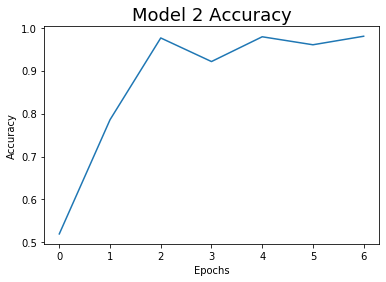

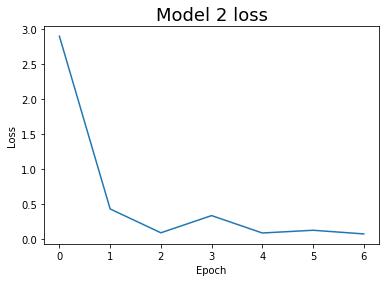


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       819
           1       1.00      0.96      0.98       806

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625


 Confusion Matrix 
 [[816   3]
 [ 32 774]]

 Accuracy: 97.85 %

 F1 Score:  0.978

 Precision:  0.979

 Recall:  0.978
Time taken by Model 2 :  5.6404032707214355 seconds


In [34]:
import time
start2 = time.time()
model2()
end2 = time.time()
print("Time taken by Model 2 : ",(end2 - start2),"seconds")
training_time.append((end2 - start2))

Epoch 1/10
13/13 [==============================] - 0s 6ms/step - loss: 0.4873 - accuracy: 0.7977
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1705 - accuracy: 0.9571
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1070 - accuracy: 0.9746
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0856 - accuracy: 0.9789
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9798
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0770 - accuracy: 0.9794
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0736 - accuracy: 0.9805
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0683 - accuracy: 0.9822
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9840
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9889


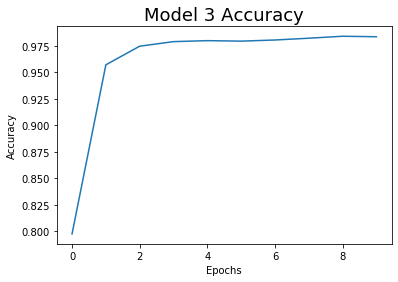

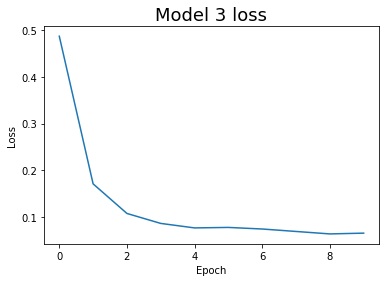


 Classification Report 
 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       819
           1       1.00      0.98      0.99       806

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


 Confusion Matrix 
 [[819   0]
 [ 18 788]]

 Accuracy: 98.89 %

 F1 Score:  0.989

 Precision:  0.989

 Recall:  0.989
Time taken by Model 3 :  3.2070469856262207 seconds


In [35]:
import time
start3 = time.time()
model3()
end3 = time.time()
print("Time taken by Model 3 : ",(end3 - start3),"seconds")
training_time.append((end3 - start3))

## Calculating Training speed using GPU

Implemented the three models using GPU and find the implementation in the below link

https://colab.research.google.com/drive/1a9kCiXNrQkvX5v5B4WgdhMCw_HMDmUB-?usp=sharing



### GPU Training speed

[2.067770004272461, 3.7684085369110107, 1.834216594696045]

<table style="width:50%">
    <h4 align='center'>Results</h4>
  <tr>
    <th></th>
    <th>GPU</th>
    <th>CPU</th> 
  </tr>
  <tr>
    <th>Method/ Model 1</th>
    <td>2.067770004272461</td> 
    <td>5.084234952926636</td>
  </tr>
    <tr>
    <th>Method/ Model 2</th>
    <td>3.7684085369110107</td> 
    <td>5.6404032707214355</td>
  </tr>
      <tr>
    <th>Method/ Model 3</th>
    <td>1.834216594696045</td> 
    <td>3.2070469856262207</td>
  </tr>
 
</table>

### Results

Though the results from GPU are not better as compared to our normal CPU. This could be because of small size of our data.
GPU could give better results better on may be very large dataset.